# Marketing and Retail Analytics - Capstone Project

## OList Retail Dataset

OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.

In this assignment, we need to manage the inventory cost of this e-commerce company. We need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

## Data Exploration and Cleaning

- Reading the datasets.
- Identifying missing values,Outliers and treating them as per standards(Imputing missing values is the technique followed)
- Each individual sheets in original data are cleaned and finally consolidated.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

### 1.Orders

In [2]:
orders=pd.read_excel('Retail_dataset.xlsx',sheet_name='orders')

In [3]:
def summarize_dataframe(df: pd.DataFrame):
    print("Shape:")
    print(df.shape)
    print('-' * 20)

    print("Info:")
    df.info()
    print('-' * 20)

    print("Describe:")
    print(df.describe(include='all'))  # include='all' to show all columns
    print('-' * 20)
summarize_dataframe(orders)

Shape:
(99441, 7)
--------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB
--------------------
Describe:
                                order_id                       customer_id  \
count                              99441                             99441  

In [4]:
# checking for duplicated order id
orders.order_id.duplicated().sum()

0

#### For this Analysis we are considering only delivered orders so restructuring DF to have orders with status'Delivered'

In [5]:
orders=orders[orders.order_status=='delivered']
orders.shape

(96478, 7)

In [6]:
#Finding Missing Values in the Orders sheet
def null_summary(df: pd.DataFrame):
    null_count = df.isna().sum()
    null_percent = (null_count / len(df)) * 100

    summary_df = pd.DataFrame({
        'Null Count': null_count,
        'Null Percentage': null_percent.round(2)
    })
    print(summary_df)
null_summary(orders)

                               Null Count  Null Percentage
order_id                                0             0.00
customer_id                             0             0.00
order_status                            0             0.00
order_purchase_timestamp                0             0.00
order_approved_at                      14             0.01
order_delivered_timestamp               8             0.01
order_estimated_delivery_date           0             0.00


The two columns having null values are order_approved_at and order_delivered_timestamp. Both have less % of values.
so one option is to impute the null values with values associated with them.
<br>Assuming:
- order_approved_at is the same time as order_purchase_timestamp.
- order_delivered_timestamp is the same as order_estimated_delivery_date.

In [7]:
#imputing the values as mentioned above
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_timestamp'].fillna(orders['order_estimated_delivery_date'], inplace=True)
null_summary(orders)

                               Null Count  Null Percentage
order_id                                0              0.0
customer_id                             0              0.0
order_status                            0              0.0
order_purchase_timestamp                0              0.0
order_approved_at                       0              0.0
order_delivered_timestamp               0              0.0
order_estimated_delivery_date           0              0.0


### 2.Order_items

In [8]:
order_items=pd.read_excel('Retail_dataset.xlsx',sheet_name='order_items')

In [9]:
summarize_dataframe(order_items)

Shape:
(112650, 6)
--------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB
--------------------
Describe:
                                order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std          

In [10]:
#checking for null and no missing values found so keep this sheet as it is.
null_summary(order_items)

                  Null Count  Null Percentage
order_id                   0              0.0
order_item_id              0              0.0
product_id                 0              0.0
seller_id                  0              0.0
price                      0              0.0
shipping_charges           0              0.0


In [11]:
order_items['order_id'].duplicated().sum()

13984

The duplicates in the Order_items are valid as same order id has individual entry for each item in basket.

### 3.Customers

In [12]:
customers=pd.read_excel("Retail_dataset.xlsx",sheet_name='customers')
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
summarize_dataframe(customers)

Shape:
(99441, 4)
--------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB
--------------------
Describe:
                             customer_id  customer_zip_code_prefix  \
count                              99441              99441.000000   
unique                             96096                       NaN   
top     8d50f5eadf50201ccdcedfb9e2ac8455                       NaN   
freq                                  17                       NaN   
mean                                 NaN              35137.474583   
std                   

In [14]:
null_summary(customers)

                          Null Count  Null Percentage
customer_id                        0              0.0
customer_zip_code_prefix           0              0.0
customer_city                      0              0.0
customer_state                     0              0.0


In [15]:
duplicate_customers=customers['customer_id'].duplicated().sum()
print(duplicate_customers)

3345


customer id should not have duplicate values as it causes hinderance in further analysis,<br> so removing duplicate customer ids and keeping first occurence of the id.

In [16]:
customers.drop_duplicates(subset='customer_id',keep='first',inplace=True)
customers['customer_id'].duplicated().sum()

0

### 4.Payments

In [17]:
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name = "payments")

In [18]:
summarize_dataframe(payments)

Shape:
(103886, 5)
--------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
--------------------
Describe:
                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
me

In [19]:
null_summary(payments)

                      Null Count  Null Percentage
order_id                       0              0.0
payment_sequential             0              0.0
payment_type                   0              0.0
payment_installments           0              0.0
payment_value                  0              0.0


No Null Values, Further cleaning not required for payments

### 5.Products

In [20]:
products = pd.read_excel("Retail_dataset.xlsx", sheet_name = "products")

In [21]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [22]:
summarize_dataframe(products)

Shape:
(32951, 6)
--------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB
--------------------
Describe:
                              product_id product_category_name  \
count                              32951                 32781   
unique                             32951                    70   
top     1e9e8ef04dbcff4541ed26657ea517e5                  toys   
freq                                   1                 24725   
mean              

In [23]:
null_summary(products)

                       Null Count  Null Percentage
product_id                      0             0.00
product_category_name         170             0.52
product_weight_g                2             0.01
product_length_cm               2             0.01
product_height_cm               2             0.01
product_width_cm                2             0.01


array([[<Axes: title={'center': 'product_weight_g'}>,
        <Axes: title={'center': 'product_length_cm'}>],
       [<Axes: title={'center': 'product_height_cm'}>,
        <Axes: title={'center': 'product_width_cm'}>]], dtype=object)

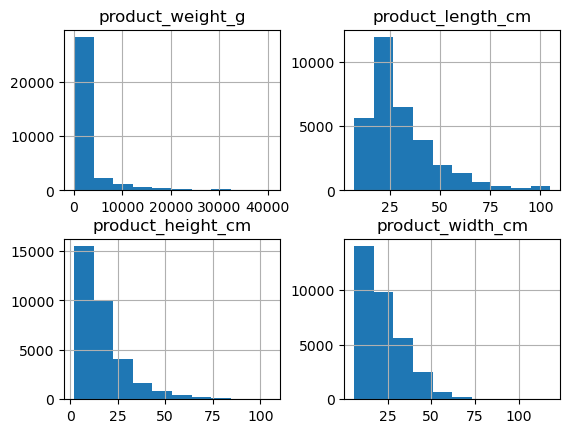

In [24]:
products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe()
products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].hist()

In [25]:
# Calculate skewness
products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].skew()

product_weight_g     3.604860
product_length_cm    1.750460
product_height_cm    2.140061
product_width_cm     1.670971
dtype: float64

The columns having null values are product_category_name, product_weight_g, product_length_cm, product_height_cm and product_width_cm. 
- We will impute the null values in product_category_name with the mode of the column.
- We will impute the null values of the remaiming columns with median as they are right skewed as per the above so median will be imputed for them.

In [26]:
# checking the mode of the product_category_name column
products["product_category_name"].mode()[0]

'toys'

In [27]:
# imputing the null values of the product_category_name column with 'toys' which is the mode of the column
products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace = True)

In [28]:
# imputing the null values with the median of the columns, since there is right skewed skewness
products.product_weight_g.fillna(products.product_weight_g.median(), inplace = True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace = True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace = True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace = True)

In [29]:
null_summary(products)

                       Null Count  Null Percentage
product_id                      0              0.0
product_category_name           0              0.0
product_weight_g                0              0.0
product_length_cm               0              0.0
product_height_cm               0              0.0
product_width_cm                0              0.0


In [30]:
#function to write a new Excel workbook with given list of sheet
def export_to_excel(filename, sheet_df_map):
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        for sheet_name, df in sheet_df_map.items():
            df.to_excel(writer, sheet_name=sheet_name, index=False)
    
    print(f"✅ File '{filename}' exported successfully.")
    print(f"📁 Location: {os.path.abspath(filename)}")



In [31]:
export_to_excel("Retail_dataset_cleaned.xlsx", {
        "orders": orders,
        "order_items": order_items,
        "customers": customers,
        "payments": payments,
        "products": products
    })

✅ File 'Retail_dataset_cleaned.xlsx' exported successfully.
📁 Location: C:\Users\Abi\Downloads\Jupyter notebooks\main_program\Cap_stone\Marketing_Retail_Analytics_Capstone\Retail_dataset_cleaned.xlsx


## Market Basket Analysis
<br>
Market Basket Analysis (MBA) is a technique used to uncover patterns in customer purchasing behavior by identifying combinations of product categories that are frequently bought together. This process typically involves constructing a matrix where both the rows and columns represent different product categories. Each cell in the matrix captures how often a particular pair of categories appears together in the same transaction. By analyzing these pairwise associations, businesses can detect strong relationships between items—such as customers who purchase laptops often also buying laptop bags or mice. These insights are valuable for making informed decisions about product placement, cross-selling opportunities, and targeted marketing strategies. Ultimately, MBA helps retailers enhance customer experience and boost sales by aligning offerings with real-world buying habits.
<br>
<br>
<i>using Cleaned dataset (Retail_dataset_Cleaned) for this purpose.</i>

In [32]:
df1 = pd.read_excel("Retail_dataset_cleaned.xlsx", sheet_name = "order_items")
df2 = pd.read_excel("Retail_dataset_cleaned.xlsx", sheet_name = "products")
mb=pd.merge(df1,df2,how='inner',on='product_id')

In [33]:
mb.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14


As we only need product categories and order_id for market basket analysis removing other columns

In [34]:
mb=mb[["order_id", "product_category_name"]]
mb.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [35]:
mb.shape

(112650, 2)

In [36]:
export_to_excel("Market_Basket_Analysis.xlsx",{"orders_Analysis":mb})

✅ File 'Market_Basket_Analysis.xlsx' exported successfully.
📁 Location: C:\Users\Abi\Downloads\Jupyter notebooks\main_program\Cap_stone\Marketing_Retail_Analytics_Capstone\Market_Basket_Analysis.xlsx


<b>Data Visualisation of Retail data cleaned and Market_Basket Analysis will be performed in Viz tool(powerBi/Tableau</b>